# <span style=color:blue> Numerical Simulation Laboratory #
## <span style=color:blue> Exercise lecture 6 ##
### Mattia Nasi 11590A ###

## <span style=color:red> 06.1 ##
This exercise is about the simulation of the 1D Ising model, a problem that is analitically solvable as show in the Appendix, here the solution is obtained via a stochastic appproach. 

To achieve this i need to introduce the sampling algorithms necessary to sample the Boltzmann weight $p(\{ s_i \}) = \exp(-\beta H)/Z$:
1. Metropolis algorithm, already implemented in the given code, works by proposing a move to a new state of the system and then decide wether to accept it or not with probability $p(s \to s') = \min\left(1, e^{-\frac{\Delta E}{k_B T}} \right)$
2. Gibbs algorithm, implemented by me in te code, is a special case of Montecarlo where the proposed move is always accepted, that is because the sampling happens directly on the conditional distribution defined by all the other states (neighbours) without the self counting. This leads to a transition probability of the form $p(s_k = \pm 1 \mid \{s_j\}_{j \ne k}) = \frac{1}{1 + \exp\left(\mp 2 \beta J \sum_{j \in \text{nn}(k)} s_j \right)} $

Bot sampling methods will be used in this solution and the code simply adapts to use the chosen one by an imput command given before the simulation starts, the only procedural difference is the production or not of an acceptance plot which is clearly non necessary for the Gibbs sampling scenario.

After introducing the sampling methods i have to explain how am i going to compute the various characteristic variables of an Ising system, the used expressions are listed below:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

All of them are calculated with $T$ in the range $[0.3;2]$, i deviated slightly from the suggested $[0.5;2]$ range to better observe the behavior of certain plots. 

The system is composed of $N = 50$ particles and $J = 1$ (view Appendix) and the statistical uncertainties are computed via the data blocking tecnique, i used $20$ blocks and $2*10^4$ steps. The simulations are done by manually changing the temperature gradually and, to be sure that the system is consistent, with the last spin configuration from the previoius simulation used as the starting point for the next one. All this process is done automatically in my code via a python script (runner.py) twice, first without the magnetic field and then with a field $H = 0.02 $.

The last step is to take the last data produced by each simulation and plot them as a function of the temperature (in my code this procedure is done by the datareorder.py script) and this process return the following plots.

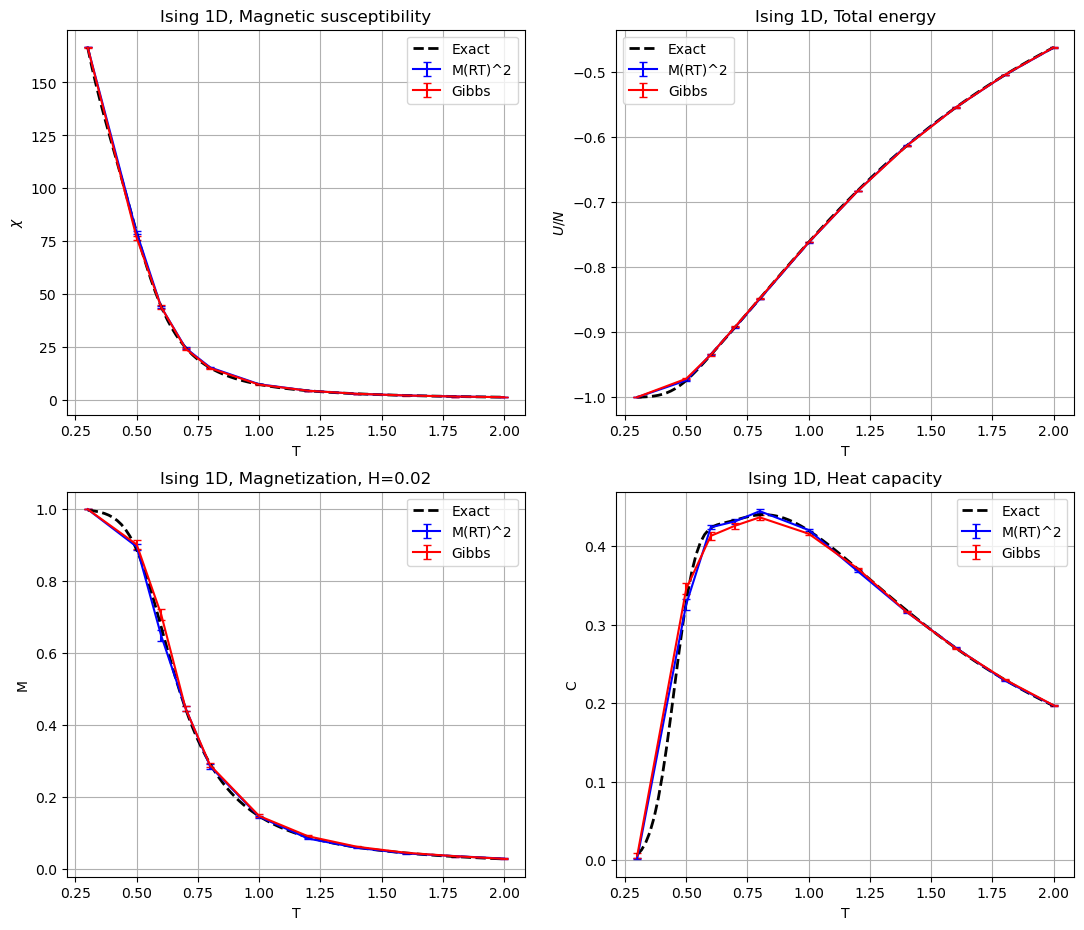

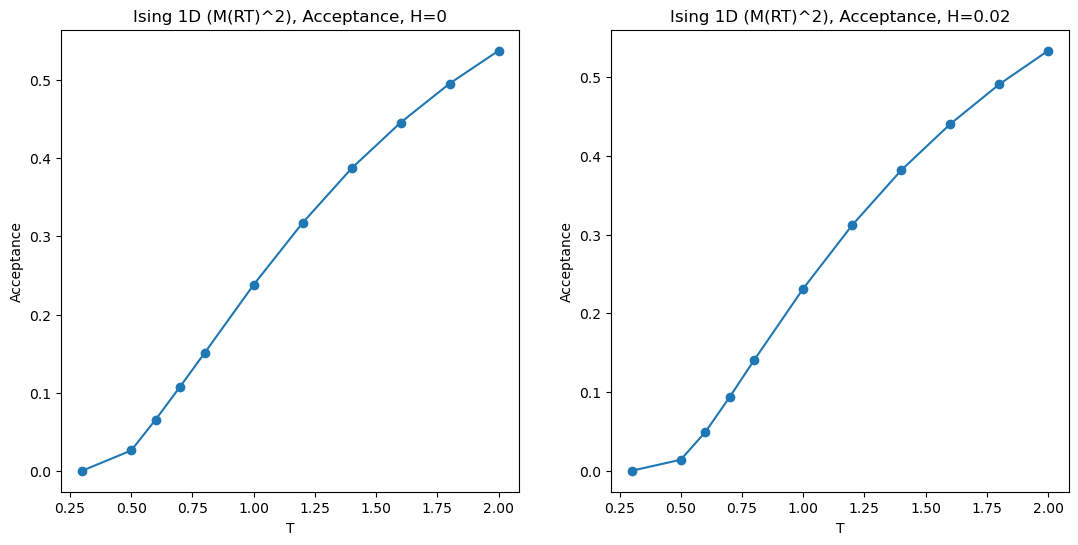

In [6]:
import numpy as np
import matplotlib.pyplot as plt

npart = 50
T, susceptMRT, errsusceptMRT = np.loadtxt("NSL_SIMULATOR/susceptMRT.dat", delimiter=',', unpack='True')
susceptG, errsusceptG = np.loadtxt("NSL_SIMULATOR/susceptG.dat", usecols=(1,2), delimiter=',', unpack='True')
energyMRT, errenergyMRT = np.loadtxt("NSL_SIMULATOR/tenergyMRT.dat", usecols=(1,2), delimiter=',', unpack='True')
energyG, errenergyG = np.loadtxt("NSL_SIMULATOR/tenergyG.dat", usecols=(1,2), delimiter=',', unpack='True')
spheatMRT, errspheatMRT = np.loadtxt("NSL_SIMULATOR/spheatMRT.dat", usecols=(1,2), delimiter=',', unpack='True')
spheatG, errspheatG = np.loadtxt("NSL_SIMULATOR/spheatG.dat", usecols=(1,2), delimiter=',', unpack='True')
magnetMRT, errmagnetMRT = np.loadtxt("NSL_SIMULATOR/magnetMRT.dat", usecols=(1,2), delimiter=',', unpack='True')
magnetG, errmagnetG = np.loadtxt("NSL_SIMULATOR/magnetG.dat", usecols=(1,2), delimiter=',', unpack='True')
T1, accept = np.loadtxt("NSL_SIMULATOR/acceptanceMRT_H=0.dat", delimiter=',', unpack='True')
T1, acceptH = np.loadtxt("NSL_SIMULATOR/acceptanceMRT_H.dat", delimiter=',', unpack='True')

T_fine = np.linspace(0.3, 2.0, 100)
J = 1.0
Ns = npart
beta_f = 1 / T_fine
th_f = np.tanh(J / T_fine)
thN_f = th_f ** Ns
ch_f = 1 / th_f
etheory_f = -J * (th_f + ch_f * thN_f) / (1 + thN_f)
heat_f = ((beta_f * J) ** 2) * (((1 + thN_f + (Ns - 1) * (th_f**2) + (Ns - 1) * (ch_f**2) * thN_f) / (1 + thN_f)) -
                                Ns * ((th_f + ch_f * thN_f) / (1 + thN_f))**2)
h = 0.02
b_f = 1 / T_fine
expbJ = np.exp(b_f * J)
coshbH = np.cosh(b_f * h)
sinh2bJ = np.sinh(2 * b_f * J)
sqrt_term = np.sqrt(expbJ**2 * coshbH**2 - 2 * sinh2bJ)

l1 = expbJ * coshbH + sqrt_term
l2 = expbJ * coshbH - sqrt_term
Z = l1**Ns + l2**Ns
M_f = (expbJ * np.sinh(b_f * h) *
       ((l1**(Ns - 1)) * (1 + expbJ * coshbH / sqrt_term) +
        (l2**(Ns - 1)) * (1 - expbJ * coshbH / sqrt_term))) / Z

X_f = beta_f * np.exp(2 * beta_f * J) * (1 - thN_f) / (1 + thN_f)

fig, axs = plt.subplots(2, 2, figsize=(13, 11))

axs[0, 0].errorbar(T, susceptMRT, yerr=errsusceptMRT, color='b', capsize=3, label='M(RT)^2')
axs[0, 0].errorbar(T, susceptG, yerr=errsusceptG, color='r', capsize=3, label='Gibbs')
axs[0, 0].plot(T_fine, X_f, 'k--', linewidth=2, label='Exact')
axs[0, 0].set_ylabel(r'$\chi$')
axs[0, 0].set_xlabel("T")
axs[0, 0].set_title("Ising 1D, Magnetic susceptibility")
axs[0, 0].grid(True)
axs[0, 0].legend()

axs[0, 1].errorbar(T, energyMRT, yerr=errenergyMRT, color='b', capsize=3, label='M(RT)^2')
axs[0, 1].errorbar(T, energyG, yerr=errenergyG, color='r', capsize=3, label='Gibbs')
axs[0, 1].plot(T_fine, etheory_f, 'k--', linewidth=2, label='Exact')
axs[0, 1].set_ylabel("$U/N$")
axs[0, 1].set_xlabel("T")
axs[0, 1].set_title("Ising 1D, Total energy")
axs[0, 1].grid(True)
axs[0, 1].legend()

axs[1, 0].errorbar(T, magnetMRT, yerr=errmagnetMRT, color='b', capsize=3, label='M(RT)^2')
axs[1, 0].errorbar(T, magnetG, yerr=errmagnetG, color='r', capsize=3, label='Gibbs')
axs[1, 0].plot(T_fine, M_f, 'k--', linewidth=2, label='Exact')
axs[1, 0].set_ylabel("M")
axs[1, 0].set_xlabel("T")
axs[1, 0].set_title("Ising 1D, Magnetization, H=0.02")
axs[1, 0].grid(True)
axs[1, 0].legend()

axs[1, 1].errorbar(T, spheatMRT, yerr=errspheatMRT, color='b', capsize=3, label='M(RT)^2')
axs[1, 1].errorbar(T, spheatG, yerr=errspheatG, color='r', capsize=3, label='Gibbs')
axs[1, 1].plot(T_fine, heat_f, 'k--', linewidth=2, label='Exact')
axs[1, 1].set_ylabel("C")
axs[1, 1].set_xlabel("T")
axs[1, 1].set_title("Ising 1D, Heat capacity")
axs[1, 1].grid(True)
axs[1, 1].legend()

fig1, axs1 = plt.subplots(1, 2, figsize=(13, 6))

axs1[0].plot(T1, accept, 'o-')
axs1[0].set_ylabel("Acceptance")
axs1[0].set_xlabel("T")
axs1[0].set_title("Ising 1D (M(RT)^2), Acceptance, H=0")

axs1[1].plot(T1, acceptH, 'o-')
axs1[1].set_ylabel("Acceptance")
axs1[1].set_xlabel("T")
axs1[1].set_title("Ising 1D (M(RT)^2), Acceptance, H=0.02")

plt.show()

As shown above both the sampling methods are able to accurately reproduce the exact solutions within the statistical uncertainty with no observable difference between Montecarlo $((M(RT)^2)$ and Gibbs. As said above the acceptance plots are produced only in Montecarlo runs, they show an expected behavior, for high temperatures the acceptance is high because the system is exploring many configurations, as the temperature decreases the system is "freezing" around the energy minimum so only few good moves are accepted (the ones that produce a $\Delta E$ are nearly always rejected). 

## <span style=color:red> Appendix ##

The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N} \frac{\partial U(N,T)}{\partial T} \Big|_{h=0} =
k_B (\beta J)^2 \left\{
1 + \tanh^N(\beta J)
+ (N-1)\tanh^2(\beta J)
+ (N-1) \frac{\tanh^{N-2}(\beta J)}{1 + \tanh^N(\beta J)}
- N \left[
\frac{ \tanh(\beta J) + \tanh^{N-1}(\beta J) }{1 + \tanh^N(\beta J)}
\right]^2
\right\}
$$

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$